In [1]:
from ucimlrepo import fetch_ucirepo 
  
  
# fetch dataset 
sepsis_survival_minimal_clinical_records = fetch_ucirepo(id=827) 
  
# data (as pandas dataframes) 
X = sepsis_survival_minimal_clinical_records.data.features 
y = sepsis_survival_minimal_clinical_records.data.targets 
  
# # metadata 
# print(sepsis_survival_minimal_clinical_records.metadata) 
  
# # variable information 
# print(sepsis_survival_minimal_clinical_records.variables) 



In [2]:
import pandas as pd
df = pd.concat([X, y], axis=1)

df.rename(columns={
    'age_years': 'Age',
    'sex_0male_1female': 'Sex',
    'episode_number': 'Episode_Number',
    'hospital_outcome_1alive_0dead': 'Hospital_Outcome'
}, inplace=True)

df.head(5)

,Age,Sex,Episode_Number,Hospital_Outcome
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1


In [3]:
df.shape

(110341, 4)

In [4]:
rows, columns = df.shape
df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")
print(df.dtypes)
print(df.describe())

Number of rows: 110341
Number of columns: 4
Age                 int64
Sex                 int64
Episode_Number      int64
Hospital_Outcome    int64
dtype: object
                 Age            Sex  Episode_Number  Hospital_Outcome
count  110341.000000  110341.000000   110341.000000     110341.000000
mean       62.731288       0.473786        1.349145          0.926328
std        24.118424       0.499315        0.751472          0.261237
min         0.000000       0.000000        1.000000          0.000000
25%        51.000000       0.000000        1.000000          1.000000
50%        68.000000       0.000000        1.000000          1.000000
75%        81.000000       1.000000        1.000000          1.000000
max       100.000000       1.000000        5.000000          1.000000


In [5]:
print(sepsis_survival_minimal_clinical_records.variables) 

                            name     role     type demographic  \
0                      age_years  Feature  Integer         Age   
1              sex_0male_1female  Feature   Binary      Gender   
2                 episode_number  Feature  Integer        None   
3  hospital_outcome_1alive_0dead   Target   Binary        None   

                                         description  units missing_values  
0                       Age of the patient in years.  years             no  
1  Gender of the patient. Values are encoded as f...   None             no  
2                    Number of prior Sepsis episodes   None             no  
3  Status of the patient after 9,351 days of bein...   None             no  


In [6]:
sepsis_survival_minimal_clinical_records.variables


,name,role,type,demographic,description,units,missing_values
0,age_years,Feature,Integer,Age,Age of the patient in years.,years,no
1,sex_0male_1female,Feature,Binary,Gender,Gender of the patient. Values are encoded as f...,None,no
2,episode_number,Feature,Integer,None,Number of prior Sepsis episodes,None,no
3,hospital_outcome_1alive_0dead,Target,Binary,None,"Status of the patient after 9,351 days of bein...",None,no


In [7]:
y = df['Hospital_Outcome']
X = df.drop(columns=['Hospital_Outcome'])

# print(df['Age'].describe())
print("\n")
print(df['Age'].value_counts())



Age
82     2666
84     2623
81     2541
83     2524
80     2521
       ... 
10      159
14      153
13      151
100     128
99       84
Name: count, Length: 101, dtype: int64


In [8]:
print(df['Sex'].value_counts())

Sex
0    58063
1    52278
Name: count, dtype: int64


In [9]:
# print(df['Episode_Number'].describe())
print("\n")
print(df['Episode_Number'].value_counts())



Episode_Number
1    84926
2    16710
3     5403
4     2199
5     1103
Name: count, dtype: int64


In [10]:
print(y.value_counts())

Hospital_Outcome
1    102212
0      8129
Name: count, dtype: int64


In [11]:
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)

Age                 0
Sex                 0
Episode_Number      0
Hospital_Outcome    0
dtype: int64


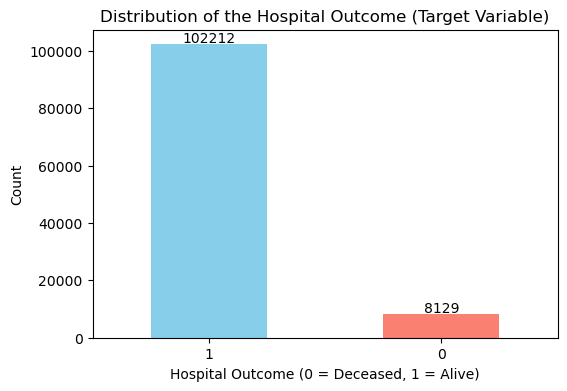

In [12]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(6,4))
ax = y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 4), textcoords='offset points')

# Set title and labels
plt.title('Distribution of the Hospital Outcome (Target Variable)')
plt.xlabel('Hospital Outcome (0 = Deceased, 1 = Alive)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


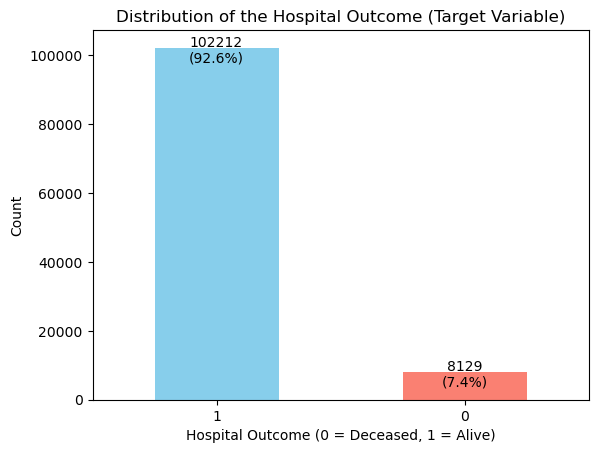

In [13]:
import matplotlib.pyplot as plt

# Calculate the total number of instances to compute percentages
total_count = len(y)

# Plot the distribution of the target variable
plt.figure()
ax = y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

# Add count and percentage labels on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total_count
    ax.annotate(f'{count}\n({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, -2), textcoords='offset points')

# Set title and labels
plt.title('Distribution of the Hospital Outcome (Target Variable)')
plt.xlabel('Hospital Outcome (0 = Deceased, 1 = Alive)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


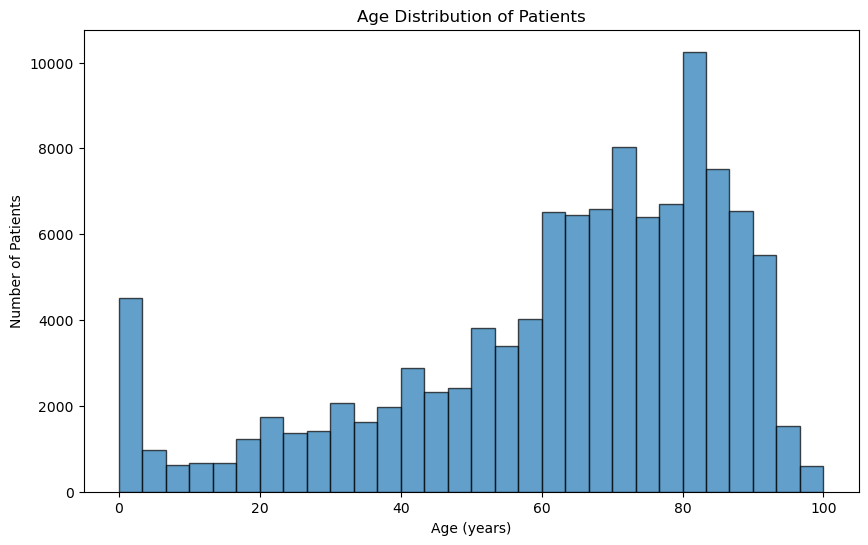

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Patients')
plt.xlabel('Age (years)')
plt.ylabel('Number of Patients')
plt.show()


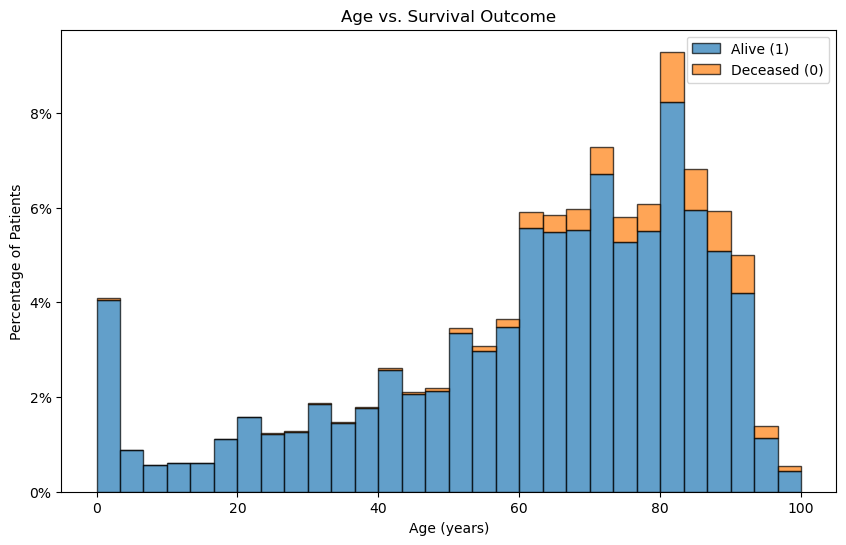

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Split the data based on survival outcome
alive = df[df['Hospital_Outcome'] == 1]['Age']
deceased = df[df['Hospital_Outcome'] == 0]['Age']

# Create the stacked histogram
plt.figure(figsize=(10, 6))

# Calculate weights for each group to normalize to percentages
weights_alive = np.ones(len(alive)) / len(df)
weights_deceased = np.ones(len(deceased)) / len(df)

plt.hist([alive, deceased], bins=30, edgecolor='black', alpha=0.7, 
         stacked=True, label=['Alive (1)', 'Deceased (0)'], 
         weights=[weights_alive, weights_deceased])

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Add titles and labels
plt.title('Age vs. Survival Outcome')
plt.xlabel('Age (years)')
plt.ylabel('Percentage of Patients')
plt.legend()

# Show the plot
plt.show()


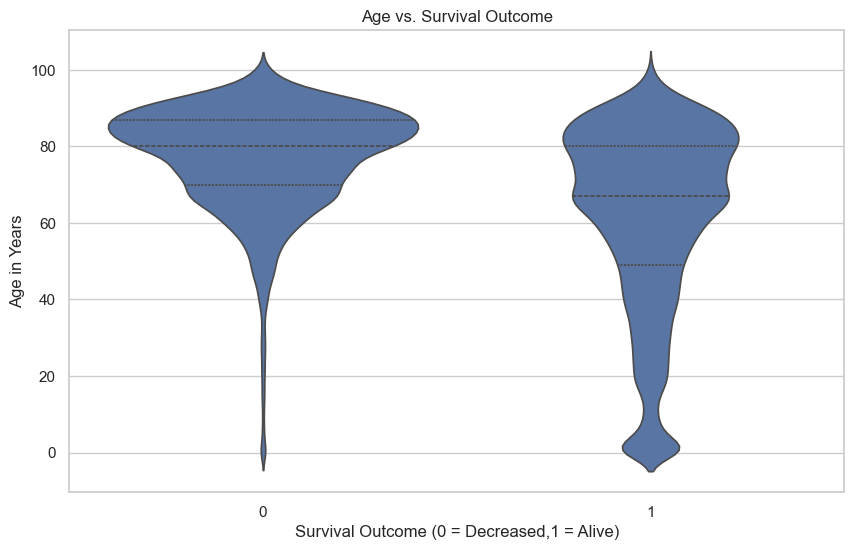

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
# Violin plot for Age Distribution vs. Survival Outcome
plt.figure(figsize=(10, 6))
sns.violinplot(x='Hospital_Outcome', y='Age', data=df, inner='quartile')
plt.title('Age vs. Survival Outcome')
plt.xlabel('Survival Outcome (0 = Decreased,1 = Alive)')
plt.ylabel('Age in Years')
plt.show()

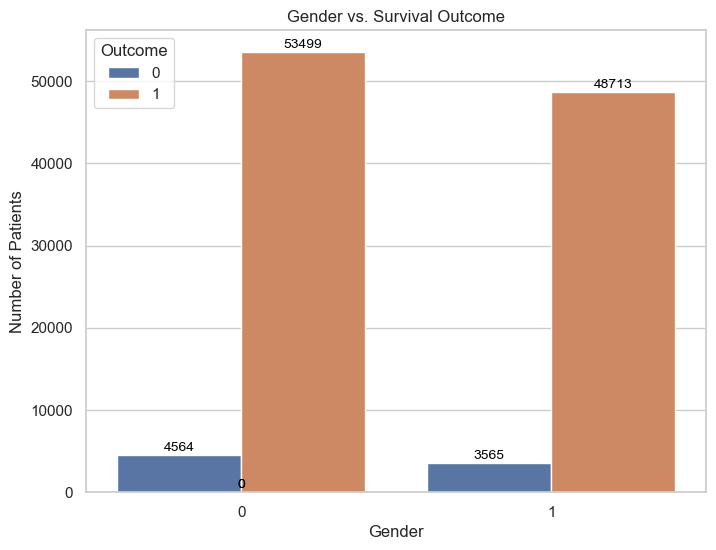

In [17]:
# Map binary codes to meaningful labels
# df['Gender'] = df['Sex'].map({0: 'Male', 1: 'Female'})
# df['Outcome'] = df['Hospital_Outcome'].map({1: 'Survived', 0: 'Deceased'})

# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x=df['Sex'], hue=df['Hospital_Outcome'])

# Add titles and labels
plt.title('Gender vs. Survival Outcome')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(title='Outcome')

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Show the plot
plt.show()



#pie chat

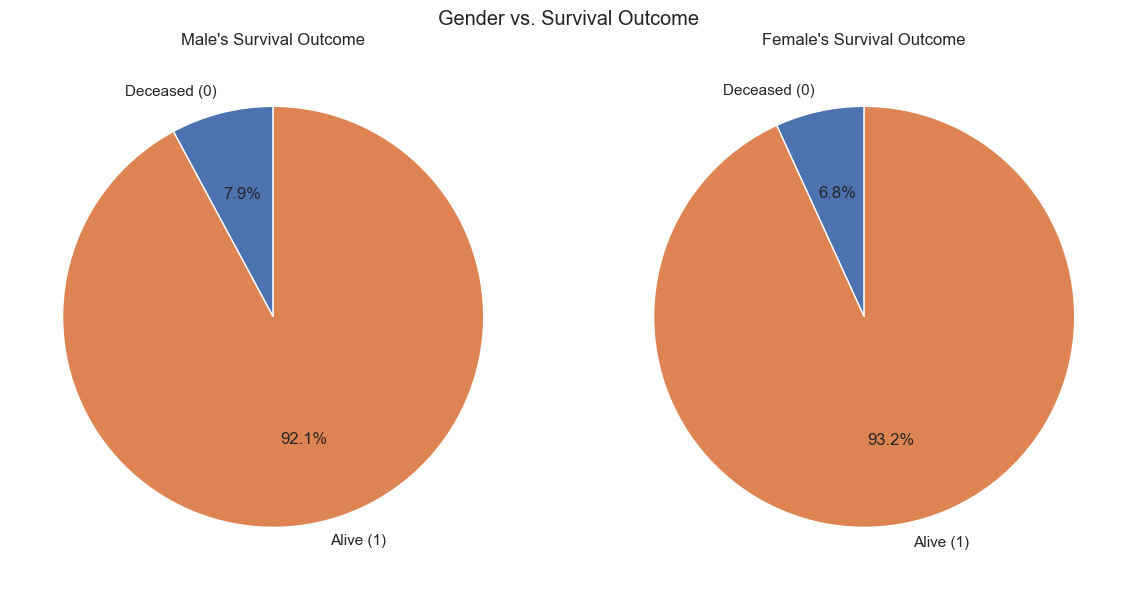

In [18]:
import matplotlib.pyplot as plt

# Group data by gender and survival outcome
gender_outcome_counts = df.groupby(['Sex', 'Hospital_Outcome']).size().unstack(fill_value=0)

# Labels for the pie chart
outcome_labels = ['Deceased (0)', 'Alive (1)']
gender_labels = ['Male', 'Female']

# Create a figure with two subplots for the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart for males (0)
ax1.pie(gender_outcome_counts.loc[0], labels=outcome_labels, autopct='%1.1f%%', startangle=90)
ax1.set_title("Male's Survival Outcome")

# Plot the pie chart for females (1)
ax2.pie(gender_outcome_counts.loc[1], labels=outcome_labels, autopct='%1.1f%%', startangle=90)
ax2.set_title("Female's Survival Outcome")

# Add a main title
plt.suptitle('Gender vs. Survival Outcome')

# Show the plot
plt.tight_layout()
plt.show()


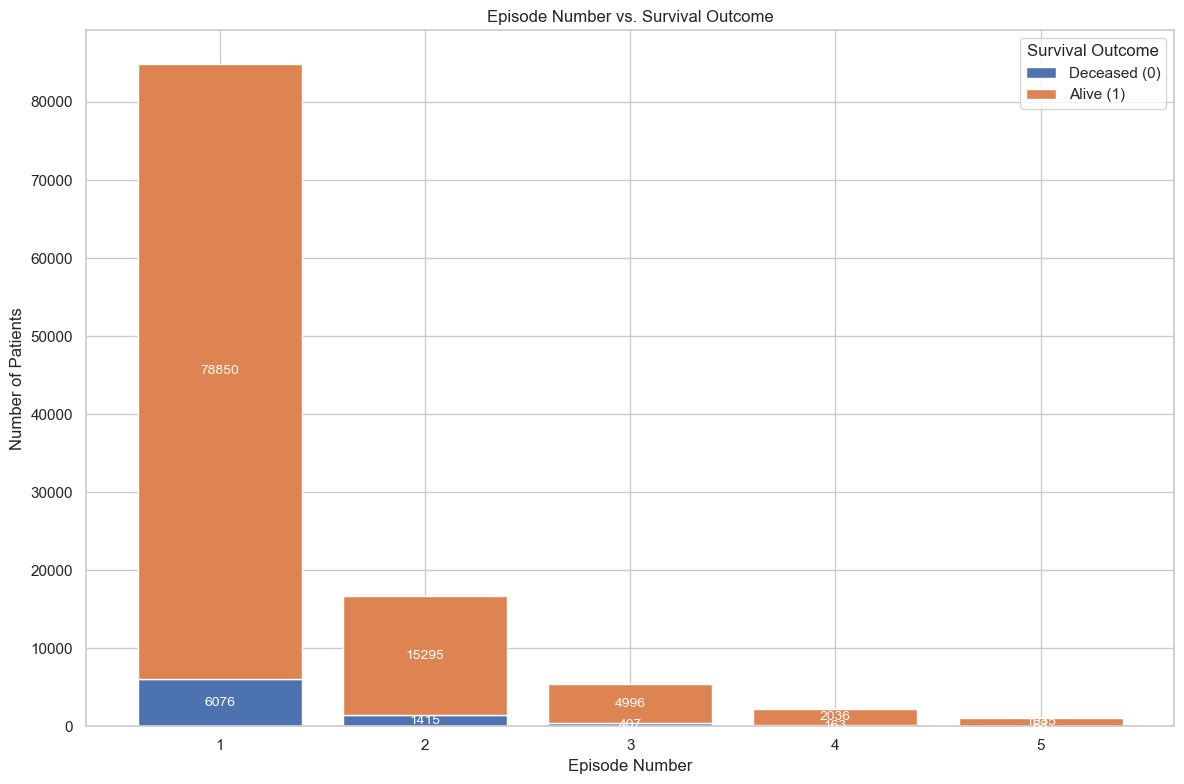

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group the data by 'Episode_Number' and 'Hospital_Outcome' and count occurrences
episode_outcome_counts = df.groupby(['Episode_Number', 'Hospital_Outcome']).size().unstack(fill_value=0)

# Create a stacked bar plot
plt.figure(figsize=(12, 8))
bars = episode_outcome_counts.plot(kind='bar', stacked=True, width=0.8, ax=plt.gca())

# Add titles and labels
plt.title('Episode Number vs. Survival Outcome')
plt.xlabel('Episode Number')
plt.ylabel('Number of Patients')
plt.legend(title='Survival Outcome', labels=['Deceased (0)', 'Alive (1)'])
plt.xticks(rotation=360)

# Add labels on top of each bar
for i in range(len(episode_outcome_counts)):
    total = 0
    for j in range(len(episode_outcome_counts.columns)):
        count = episode_outcome_counts.iloc[i, j]
        total += count
        if count > 0:  # Only add labels for non-zero counts
            plt.text(i, total - count / 2, str(count), ha='center', va='center', fontsize=10, color='white')

# Show the plot
plt.tight_layout()
plt.show()

# percentage staked bar plot


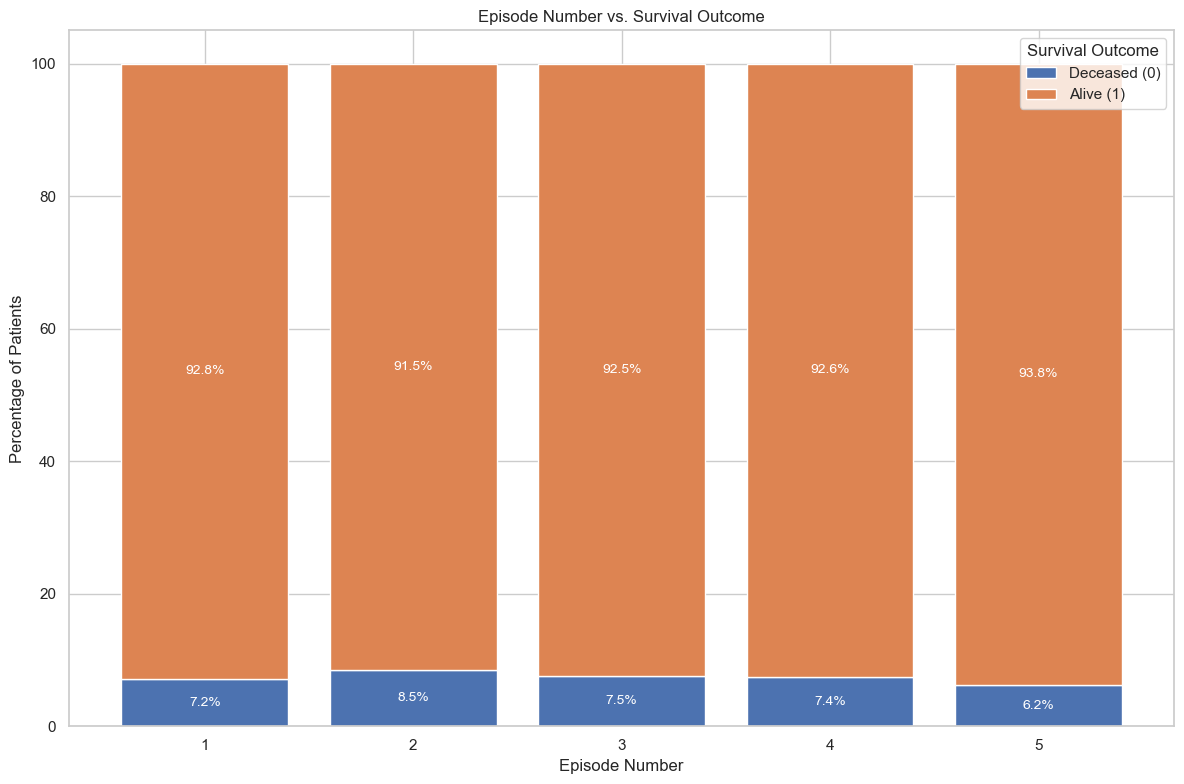

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group the data by 'Episode_Number' and 'Hospital_Outcome' and count occurrences
episode_outcome_counts = df.groupby(['Episode_Number', 'Hospital_Outcome']).size().unstack(fill_value=0)

# Convert the counts to percentages
episode_outcome_percentages = episode_outcome_counts.div(episode_outcome_counts.sum(axis=1), axis=0) * 100

# Create a percentage stacked bar plot
plt.figure(figsize=(12, 8))
bars = episode_outcome_percentages.plot(kind='bar', stacked=True, width=0.8, ax=plt.gca())

# Add titles and labels
plt.title('Episode Number vs. Survival Outcome')
plt.xlabel('Episode Number')
plt.ylabel('Percentage of Patients')
plt.legend(title='Survival Outcome', labels=['Deceased (0)', 'Alive (1)'])
plt.xticks(rotation=360)

# Add percentage labels on top of each bar
for i in range(len(episode_outcome_percentages)):
    total = 0
    for j in range(len(episode_outcome_percentages.columns)):
        percentage = episode_outcome_percentages.iloc[i, j]
        total += percentage
        if percentage > 0:  # Only add labels for non-zero percentages
            plt.text(i, total - percentage / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Show the plot
plt.tight_layout()
plt.show()


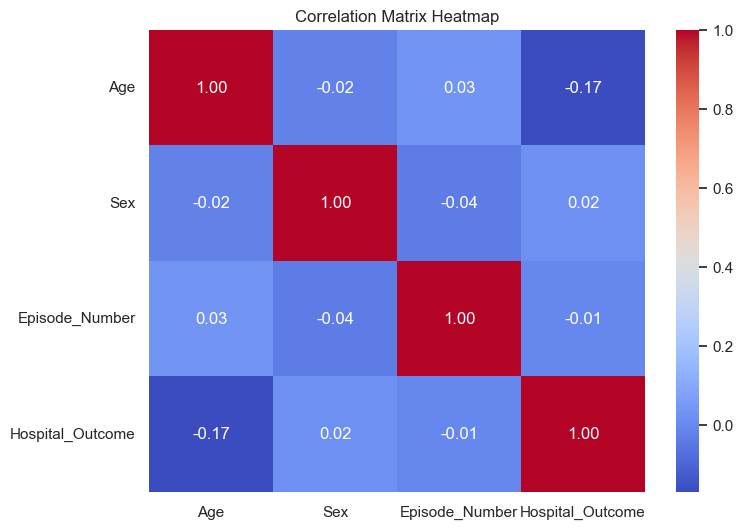

In [31]:
# Calculate the correlation matrix
corr__matrix = df.corr(method= 'pearson')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


In [34]:
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

random_state = 17

X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)


kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)

result = kf.split(X_other,y_other)

for train_index, val_index in result:
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]

    # # percentage of 0 and 1 in train and val
    # print(np.unique(y_train))
    # print(np.unique(y_val))
    # print("Train:", train_index)
    # # print("Test:", )
    # print("Validation:", val_index)
 
    # Calculate the percentage of 0 and 1 in y_train
    train_counts = np.bincount(y_train)
    train_percentages = train_counts / len(y_train) * 100
    print(f'Train set: 0 - {train_percentages[0]:.2f}%, 1 - {train_percentages[1]:.2f}%')
    print(train_counts[0])
    print(train_counts[1])

    # Calculate the percentage of 0 and 1 in y_val
    val_counts = np.bincount(y_val)
    val_percentages = val_counts / len(y_val) * 100
    print(f'Validation set: 0 - {val_percentages[0]:.2f}%, 1 - {val_percentages[1]:.2f}%')
    print(val_counts[0])
    print(val_counts[1])

    # Calculate the percentage of 0 and 1 in y_test
    test_counts = np.bincount(y_test)
    test_percentages = test_counts / len(y_test) * 100
    print(f'Test set: 0 - {test_percentages[0]:.2f}%, 1 - {test_percentages[1]:.2f}%')
    print(test_counts[0])
    print(test_counts[1])


    # Print the indices of train and validation sets
    print("Train indices:", train_index)
    print("Validation indices:", val_index)
    print('-' * 40)

    # Calculate the sizes
    train_size = len(X_train)
    val_size = len(X_val)
    test_size = len(X_test)

    # # Calculate the ratios
    # total_size = len(X)
    # train_ratio = train_size / total_size * 100
    # val_ratio = val_size / total_size * 100
    # test_ratio = test_size / total_size * 100

    # # Print the sizes and ratios
    # print(f'Train size: {train_size} ({train_ratio:.2f}%)')
    # print(f'Validation size: {val_size} ({val_ratio:.2f}%)')
    # print(f'Test size: {test_size} ({test_ratio:.2f}%)')
    # print('-' * 40)

new fold
Train set: 0 - 7.37%, 1 - 92.63%
4878
61326
Validation set: 0 - 7.36%, 1 - 92.64%
1625
20443
Test set: 0 - 7.37%, 1 - 92.63%
1626
20443
Train indices: [    0     2     3 ... 88269 88270 88271]
Validation indices: [    1     6     7 ... 88256 88261 88263]
----------------------------------------
new fold
Train set: 0 - 7.37%, 1 - 92.63%
4877
61327
Validation set: 0 - 7.37%, 1 - 92.63%
1626
20442
Test set: 0 - 7.37%, 1 - 92.63%
1626
20443
Train indices: [    0     1     2 ... 88268 88270 88271]
Validation indices: [    4    12    13 ... 88266 88267 88269]
----------------------------------------
new fold
Train set: 0 - 7.37%, 1 - 92.63%
4877
61327
Validation set: 0 - 7.37%, 1 - 92.63%
1626
20442
Test set: 0 - 7.37%, 1 - 92.63%
1626
20443
Train indices: [    0     1     2 ... 88269 88270 88271]
Validation indices: [    3    11    15 ... 88262 88264 88268]
----------------------------------------
new fold
Train set: 0 - 7.37%, 1 - 92.63%
4877
61327
Validation set: 0 - 7.37%, 1 - 9

In [23]:
print(X_train.describe())

                Age           Sex  Episode_Number
count  66204.000000  66204.000000    66204.000000
mean      62.750378      0.473838        1.346112
std       24.090796      0.499319        0.745333
min        0.000000      0.000000        1.000000
25%       51.000000      0.000000        1.000000
50%       69.000000      0.000000        1.000000
75%       81.000000      1.000000        1.000000
max      100.000000      1.000000        5.000000


In [24]:
# Get the total count
total_count = y.value_counts().sum()

# Calculate the percentage for each class
percentage = y.value_counts() / total_count * 100

# Display the result
print(percentage)

Hospital_Outcome
1    92.632838
0     7.367162
Name: count, dtype: float64


In [35]:
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler

scaler = MinMaxScaler()
X_train_age = scaler.fit_transform(X_train[['Age']])
X_val_age = scaler.transform(X_val[['Age']])
X_test_age = scaler.transform(X_test[['Age']])

encoder = OrdinalEncoder()
X_train_epNum = encoder.fit_transform(X_train[['Episode_Number']])
X_val_epNum = encoder.transform(X_val[['Episode_Number']])
X_test_epNum = encoder.transform(X_test[['Episode_Number']])


# Convert the prep arrays back into DataFrames with the original column names
X_train_prep = X_train.copy()
X_train_prep['Age'] = X_train_age
X_train_prep['Episode_Number'] = X_train_epNum

X_val_prep = X_val.copy()
X_val_prep['Age'] = X_val_age
X_val_prep['Episode_Number'] = X_val_epNum

X_test_prep = X_test.copy()
X_test_prep['Age'] = X_test_age
X_test_prep['Episode_Number'] = X_test_epNum

# Now X_train_prep, X_val_prep, and X_test_prep have the updated columns

# print("Original X_train shape:", X_train.shape)
# print("Transformed X_train_prep shape:", X_train_prep.shape)
# print("\n")
print(" 'X_train' Before preprocessing:")
print("\n", X_train.describe())
print("\n")
print("'X_train' After preprocessing:")
print("\n", X_train_prep.describe())

 'X_train' Before preprocessing:

                 Age           Sex  Episode_Number
count  66204.000000  66204.000000    66204.000000
mean      62.750378      0.473838        1.346112
std       24.090796      0.499319        0.745333
min        0.000000      0.000000        1.000000
25%       51.000000      0.000000        1.000000
50%       69.000000      0.000000        1.000000
75%       81.000000      1.000000        1.000000
max      100.000000      1.000000        5.000000


'X_train' After preprocessing:

                 Age           Sex  Episode_Number
count  66204.000000  66204.000000    66204.000000
mean       0.627504      0.473838        0.346112
std        0.240908      0.499319        0.745333
min        0.000000      0.000000        0.000000
25%        0.510000      0.000000        0.000000
50%        0.690000      0.000000        0.000000
75%        0.810000      1.000000        0.000000
max        1.000000      1.000000        4.000000


In [32]:
# print(X_train.shape())
# print("\n")
# print(X_train_prep.shape())

TypeError: 'tuple' object is not callable

In [70]:
# import pandas as pd
# import numpy as np

# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder


# ordinal_ftrs = ['Episode_Number'] 
# minmax_ftrs = ['Age']
# passthrough_ftrs = ['Sex']

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('ord', OrdinalEncoder(), ordinal_ftrs),
#         ('minmax', MinMaxScaler(), minmax_ftrs)],
#     remainder='passthrough'  # Pass through the remaining columns untransformed
# )

# clf = Pipeline(steps=[('preprocessor', preprocessor)])
                                    

# X_train_prep = clf.fit_transform(X_train)
# X_val_prep = clf.transform(X_val)
# X_test_prep = clf.transform(X_test)


# # Print shapes to verify
# print("Original X_train shape:", X_train.shape)
# print("Transformed X_train_prep shape:", X_train_prep.shape)

# # Retrieve feature names
# feature_names = clf.named_steps['preprocessor'].get_feature_names_out()
# print("Transformed feature names:", feature_names)

# # Convert transformed data back to DataFrame (optional)
# X_train_prep_df = pd.DataFrame(X_train_prep, columns=feature_names)
# X_val_prep_df = pd.DataFrame(X_val_prep, columns=feature_names)
# X_test_prep_df = pd.DataFrame(X_test_prep, columns=feature_names)

# print(X_train.describe())
# print("\n")
# print(X_train_prep_df.describe())